In [8]:
# imports

import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Logistic map - Bifurcation diagram')

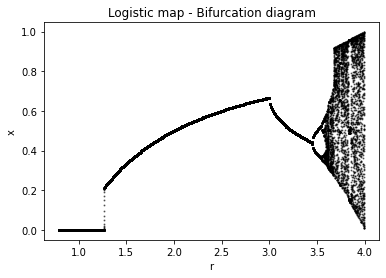

In [74]:
#Create a bifurcation diagram for the logistic map,
# x_{t+1} = r*x_t(1-x_t)
#with r ranging from 0.8 to 4.0.

time_steps = 1000
steps_to_record = 100
x= 0.5 #initial value


plt.close('all')

for r in np.arange(0.8,4,0.01):
    x_record = [] #empty list to record the x values 
    for t in range(time_steps):
        x = r*x*(1-x) #updating x with logistic equation
        if t >= time_steps-steps_to_record: #recording only some of the time steps
            x = r*x*(1-x)
            x_record.append(x)
    plt.scatter([r]*int(steps_to_record),x_record,color='black',alpha=0.5,s=1)
xlabel("r")
ylabel("x")
title("Logistic map - Bifurcation diagram")


In [58]:
# Problem 1
## Lotka-Volterra model
## dN/dt = aN - bNP
## dP/dt = cbNP -dP

# a) Interpret the biological meaning of a, b, c and d
# b) Name a major assumption of this model (e.g. what process is missing?).



a) a is the birth rate of the prey, b is the rate of predation, c is the conversion of food to babies, d is the death rate of the predator.

b) This model does not include the time taken for predators to handle the prey.


In [77]:
# c)  Use odeint (from scipy.integrate import odeint) to numerically solve the system of equations. 
#     Plot N(t) and P(t) on the same figure. Include a legend and axis labels. Use parameters a=1, b=0.1, c=0.2 and d=0.5 .


################################
### Import Stuff
################################
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [93]:
################################
### Define functions
################################


def system(NP, t, a, b, c, d ):
    """Return the growth rate of the predator and prey populations"""
    dNdt = a*NP[0] - b*NP[0]*NP[1]
    dPdt = c*b*NP[0]*NP[1] - d*NP[1]
    return np.array([dNdt, dPdt])

In [97]:
################################
### Set parameters
################################

a = 1
b = 0.1
c = 0.2
d = 0.5 

max_time = 300
num_time_points = 10000



################################
### Initialze simulation
################################

N_o = 2
P_o = 1

NP_o = np.array([N_o, P_o])

t = np.linspace(0,max_time,num_time_points)

################################
### Run the simulation
################################

simulation = odeint(system, NP_o, t, args=(a, b, c, d))


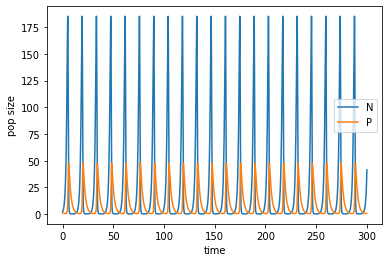

In [98]:

################################
### Plot the results
################################

plt.figure()
plt.plot(t,simulation[:,0], label='N')
plt.plot(t,simulation[:,1], label='P')
plt.xlabel('time')
plt.ylabel('pop size')
plt.legend()

Text(0, 0.5, 'P')

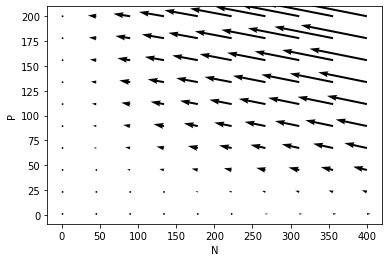

In [126]:
# d)  Calculate dN/dt and dP/dt over a region of N-P space. 
#     Use meshgrid() and stream-plot() or quiver() to create a flow map in N-P space.


N = np.linspace(1,400,10)
P = np.linspace(1,200,10) 
ns, ps = np.meshgrid(N,P)

dNdt = a*ns - b*ns*ps
dPdt = c*b*ns*ps - d*ps
quiver(ns,ps,dNdt,dPdt)

plt.xlabel('N')
plt.ylabel('P')

Text(0, 0.5, 'P')

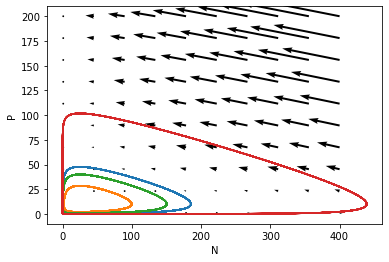

In [127]:
# e) Plot your solutions to part [c] as trajectories -- in N-P space -- on top of the figure from part [d], 
#    for four different initial conditions

t = np.linspace(0,max_time,num_time_points)

#initial condition 1
N_o = 2
P_o = 1

NP_o = np.array([N_o, P_o])

simulation = odeint(system, NP_o, t, args=(a, b, c, d))

plt.plot(simulation[:,0], simulation[:,1])

#initial condition 2
N_o = 2
P_o = 10

NP_o = np.array([N_o, P_o])

simulation = odeint(system, NP_o, t, args=(a, b, c, d))

plt.plot(simulation[:,0], simulation[:,1])

#initial condition 3
N_o = 2
P_o = 2

NP_o = np.array([N_o, P_o])

simulation = odeint(system, NP_o, t, args=(a, b, c, d))

plt.plot(simulation[:,0], simulation[:,1])

#initial condition 4
N_o = 10
P_o = 100

NP_o = np.array([N_o, P_o])

simulation = odeint(system, NP_o, t, args=(a, b, c, d))

plt.plot(simulation[:,0], simulation[:,1])

N = np.linspace(1,400,10)
P = np.linspace(1,200,10) 
ns, ps = np.meshgrid(N,P)

dNdt = a*ns - b*ns*ps
dPdt = c*b*ns*ps - d*ps
quiver(ns,ps,dNdt,dPdt)

plt.xlabel('N')
plt.ylabel('P')

In [ ]:
#Using any system of your choice, come up with your own set of ODEs (aim for two to three variables) 
#to model some phenomena in the system (for example, growth of a population, or spread of a rumor or contagion, 
#or something random from your day-to-day life). The phenomena could be hypothetical, or based on real-world observations 
#that you have studied or read about. Write down what the state variables of your model are, the parameters, 
#and some interesting assumptions you made to simplify the model compared to the real world. 
#Provide several figures of time-series plots with various combinations of parameters and initial conditions. 
#Do you think your model can have cycles and/or stable/unstable equilibria? 
#What might these model features tell you about its real-world counterpart?




Consider a population of animals that can choose to be independent (I) or in groups (G) that are faced with predation (P). I want to model I, G and P.

dI/dt = aI + bG  - cIP 

dG/dt = dI + eG - fPG

dP/dt = g(fPG + cIP) - hP

where a = rate of staying independent + reproduction rate of independent individuals
b = rate of becoming independent
c - rate of predation when independent
d - rate of joining a group
e - rate of staying in group + rate of reproduction of individuals in groups
f - rate of predation when in groups 
g - rate of converting food to predators
h - death rate of predators



In [139]:
################################
### Define functions
################################


def system(NP, t, a, b, c, d, e, f, g, h ):
    """Return the growth rate of the predator and prey populations"""
    dIdt = (a)*NP[0] + b*NP[1] - c*NP[0]*NP[2]
    dGdt = d*NP[0] + (e)*NP[1] - f*NP[1]*NP[2]
    dPdt = g*(c*NP[0]*NP[2] + f*NP[1]*NP[2]) - h*NP[2]
    return np.array([dIdt, dGdt, dPdt])

Text(0, 0.5, 'G')

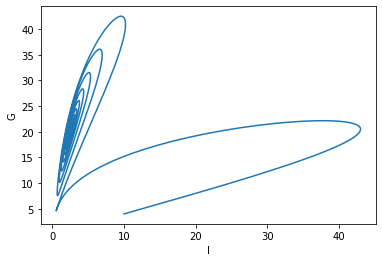

In [140]:
################################
### Set parameters
################################

a = 1
b = 0.1
c = 0.2
d = 0.01
e = 1
f = 0.1
g = 0.2
h = 0.5

max_time = 300
num_time_points = 10000



################################
### Initialze simulation
################################

I_o = 2
G_o = 4
P_o = 1

NP_o = np.array([N_o, G_o, P_o])

t = np.linspace(0,max_time,num_time_points)

################################
### Run the simulation
################################

simulation = odeint(system, NP_o, t, args=(a, b, c, d, e, f, g, h))

plt.plot(simulation[:,0], simulation[:,1])

plt.xlabel('I')
plt.ylabel('G')

Text(0, 0.5, 'G')

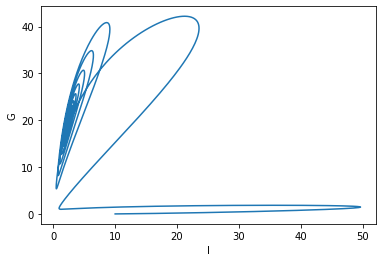

In [141]:
#initial condition 2
I_o = 4
G_o = 0
P_o = 1

NP_o = np.array([N_o, G_o, P_o])

t = np.linspace(0,max_time,num_time_points)

################################
### Run the simulation
################################

simulation = odeint(system, NP_o, t, args=(a, b, c, d, e, f, g, h))

plt.plot(simulation[:,0], simulation[:,1])

plt.xlabel('I')
plt.ylabel('G')

#not sure why lines are crossing

Text(0, 0.5, 'G')

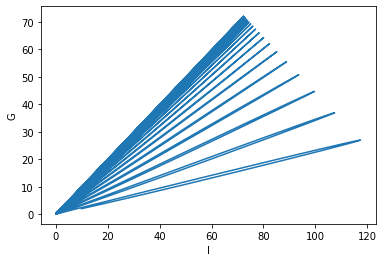

In [142]:
a = 1
b = 0.01
c = 0.1
d = 0.01
e = 1
f = 0.1
g = 0.2
h = 0.5

#predation pressure is low and same for groups and independent individuals

I_o = 2
G_o = 2
P_o = 1

NP_o = np.array([N_o, G_o, P_o])

t = np.linspace(0,max_time,num_time_points)

################################
### Run the simulation
################################

simulation = odeint(system, NP_o, t, args=(a, b, c, d, e, f, g, h))

plt.plot(simulation[:,0], simulation[:,1])

plt.xlabel('I')
plt.ylabel('G')
    
    

My model as is does have stable equilibria. I'm not sure why the extreme crashes of both the populations are occuring in cycles - perhaps because I need to relate I and G to each other? 